# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

***I did questiosn 1, 2, and 3***

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is linear when the target/dependent variable y is predicted by a vector of features and typically a constant term.
2. IT represents the average effect of a specific category compared to the reference category
3. Linear regression can be used for it, but it's not the best method becaues it often predicts values outside a range of the classes.
4. A high R2 value on training data buta lower R2 on test data can be a sign of overfitting or a model that fits training data very closely including its noise
5. Happens when two or more independent variables are highly correlated and can influence estimates wrongly. The two-stage least squares technique allows us to have more consistent estimates because the first stage predicts the problematic variable and these predictions are used in the main regression model in the second stage
6. We can use polynomial families to take the explanatory variable, x, and compute its powers.
7. The intercept is the expected value of the dependent variable when all independent variables are zero. A slope coefficient for a variable is the change in the dependent variable for every on-unit increase in the independent variable. The dummy coefficient is the difference in the dependent variable between the category respresented by the dummy variable and the reference category. 

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [12]:
df = pd.read_csv('https://github.com/alaplace17/linearModels/blob/main/data/Q1_clean.csv?raw=true')

In [13]:
df.loc[:,['Price','Neighbourhood '] ].groupby('Neighbourhood ').describe()

Price                                                      \
                  count        mean         std   min     25%    50%    75%   
Neighbourhood                                                                 
Bronx             217.0   75.276498   39.755468  10.0   50.00   60.0   90.0   
Brooklyn         8487.0  127.747378  106.038466  20.0   75.00  100.0  150.0   
Manhattan       11763.0  183.664286  170.434606  25.0  103.00  150.0  214.0   
Queens           1590.0   96.857233   61.712648  25.0   60.00   80.0  115.0   
Staten Island      96.0  146.166667  508.462029  35.0   54.75   71.0   99.0   

                         
                    max  
Neighbourhood            
Bronx             244.0  
Brooklyn         4500.0  
Manhattan       10000.0  
Queens            950.0  
Staten Island    5000.0

***Manhattan is the most expensive on average***

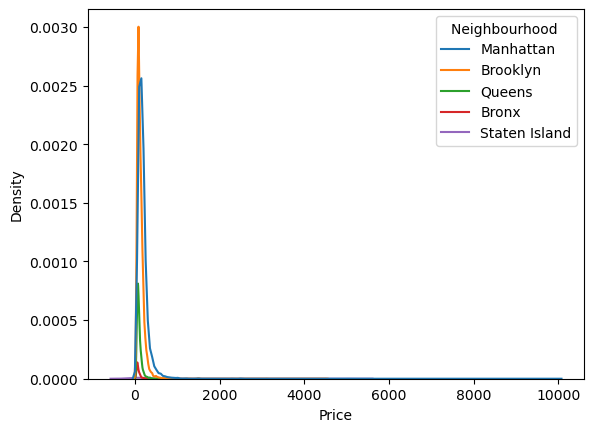

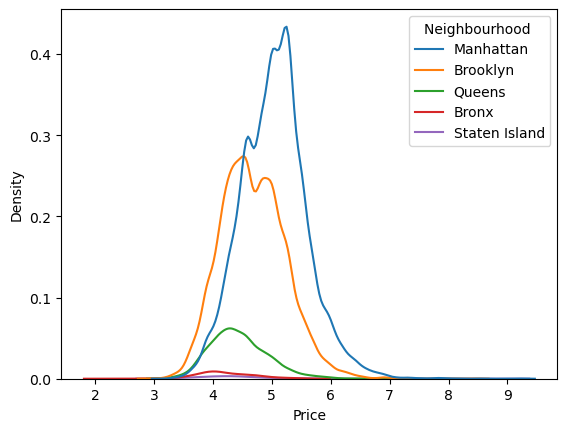

In [14]:
sns.kdeplot(x=df['Price'], hue=df['Neighbourhood '])
plt.show()

sns.kdeplot(x=np.log(df['Price']), hue=df['Neighbourhood '])
plt.show()

2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [15]:
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int')

reg = linear_model.LinearRegression(fit_intercept=False).fit(X,y)

display = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
display

,variable,coefficient
0,Bronx,75.276498
1,Brooklyn,127.747378
2,Manhattan,183.664286
3,Queens,96.857233
4,Staten Island,146.166667


***The coefficients are the same as the Average prices and are the difference in the mean of the continuous variable for the different categories of the categorical variable***

3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?

In [16]:
#Regress price but leave intercept in model
y = df['Price']
X = pd.get_dummies(df['Neighbourhood '], dtype='int', drop_first = True)

reg = linear_model.LinearRegression().fit(X,y)

display2 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
display2


,variable,coefficient
0,Brooklyn,52.470881
1,Manhattan,108.387789
2,Queens,21.580735
3,Staten Island,70.890169


In [17]:
print(reg.intercept_)

75.2764976958528


***To handle the creation of the dummies you have you to leave the intercept in the linear model with categorical variables and not drop any category when creating dummy variables. The intercept is 75.2765. In Brooklyn, the average price of properties is 52.47 dollars higher than the average price. In Manhattan, the average price of properties is 108.39 dollars higher than the average price. In Queens, the average price of properties is 21.58 dollars higher than the average price. In Staten Island, the average price of properties is 70.89 dollars higher than the average price. To get the coefficients in part 2 from these new coefficients, you would remove the intercept in the linear model and use all the data.***

4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [18]:
#Split the sample 80/20 into a training and a test set
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood '] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100) #Replication purposes

Z_train = pd.concat([X_train['Review Scores Rating'],
                     pd.get_dummies(X_train['Neighbourhood '], dtype='int')], axis = 1)
Z_test = pd.concat([X_test['Review Scores Rating'],
                    pd.get_dummies(X_test['Neighbourhood '], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2

display3 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) #Regression coefficients
display3

Rsq:  0.06701086106947296
RMSE:  125.01092061382933


,variable,coefficient
0,Review Scores Rating,1.032257
1,Bronx,-17.261392
2,Brooklyn,32.180888
3,Manhattan,89.421020
4,Queens,4.050208
5,Staten Island,61.576393


***The Rsquared is 0.067 and RMSE is 125.01. The coefficient is 1.032. The most expensive kind of property you can rent us $192.64 per night in Manhattan(100 x 1.03225 +89.4)***

5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [19]:
y = df['Price']
X = df.loc[:,['Review Scores Rating', 'Neighbourhood ', 'Property Type'] ]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=.2,
                                                    random_state=100) #Replication purposes

#All unique categories for Property Type and Neighbourhood
all_property_types = df['Property Type'].unique()
all_neighbourhoods = df['Neighbourhood '].unique()

#Create dummies with all categories for both train and test sets
Z_train = pd.concat([
    X_train['Review Scores Rating'],
    pd.get_dummies(X_train['Neighbourhood '], dtype='int', columns=all_neighbourhoods).astype(int),
    pd.get_dummies(X_train['Property Type'], dtype='int', columns=all_property_types).astype(int)
], axis=1)

Z_test = pd.concat([
    X_test['Review Scores Rating'],
    pd.get_dummies(X_test['Neighbourhood '], dtype='int', columns=all_neighbourhoods).astype(int),
    pd.get_dummies(X_test['Property Type'], dtype='int', columns=all_property_types).astype(int)
], axis=1)

#Ensure both have the same columns
Z_test = Z_test.reindex(columns=Z_train.columns, fill_value=0)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train) #Run regression
y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results4 = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) #Regression coefficients
results4


Rsq:  0.07515316986819853
RMSE:  124.46423255231858


,variable,coefficient
0,Review Scores Rating,1.015839
1,Bronx,-27.672764
2,Brooklyn,29.242598
3,Manhattan,91.749874
4,Queens,-0.373421
5,Staten Island,44.825719
6,Apartment,-2.497177
7,Bed & Breakfast,-33.828909
8,Boat,64.452800
9,Bungalow,51.260095


***R2 on the test set is 0.075 and RMSE is 124.46. Coefficient on Review Scores Rating is 1.016 and the most expensive property you can rent is 193.33 per night in Manhattan(100 x 1.015839 + 91.75)***

6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

***It means that therei s variation among prices by rating and neighborhood explained by the type of property***

7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [20]:


df = pd.read_csv('https://github.com/alaplace17/linearModels/blob/main/data/cars_hw.csv?raw=true')

In [21]:
#Clean outliers
q_low = df["Price"].quantile(0.01)
q_hi  = df["Price"].quantile(0.99)
df = df[(df["Price"] < q_hi) & (df["Price"] > q_low)]
df

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000
...,...,...,...,...,...,...,...,...,...,...,...,...
971,972,Hyundai,2018,white,sedan,23869,1st,5,petrol,6-Speed,Automatic,956000
972,973,Hyundai,2019,white,sedan,14831,1st,5,petrol,6-Speed,Automatic,1027000
973,974,Hyundai,2014,silver,sedan,52846,1st,5,petrol,4-Speed,Automatic,736000
974,975,Ford,2020,white,crossover,28335,2nd,5,diesel,5-Speed,Automatic,749000


In [22]:
#Log Transformation to fix badly scaled variables
df['Mileage_Run'] = np.log1p(df['Mileage_Run'])

2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

In [23]:
#Summarize price
print(df['Price'].describe())

count    9.560000e+02
mean     7.319100e+05
std      3.388222e+05
min      2.710000e+05
25%      4.827500e+05
50%      6.665000e+05
75%      8.772500e+05
max      1.978000e+06
Name: Price, dtype: float64


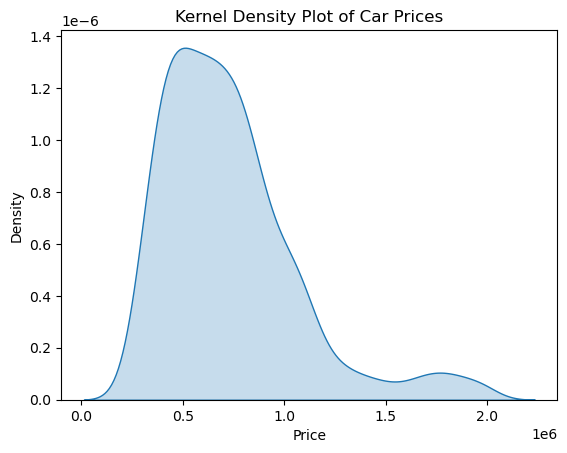

In [24]:
#Kernal density plot for price
sns.kdeplot(df['Price'], fill=True)
plt.title('Kernel Density Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()


In [25]:
#Summarize price by Make
summary_price = df.groupby('Make')['Price'].describe()
print(summary_price)

               count          mean            std        min        25%  \
Make                                                                      
Chevrolet        5.0  4.908000e+05  256093.147116   273000.0   335000.0   
Datsun           3.0  2.896667e+05   10503.967504   279000.0   284500.0   
Ford            52.0  7.211731e+05  140927.699605   290000.0   635000.0   
Honda           73.0  7.989726e+05  266509.066586   316000.0   581000.0   
Hyundai        303.0  6.947525e+05  277837.000404   273000.0   491000.0   
Jeep             4.0  1.499500e+06  152513.387391  1290000.0  1447500.0   
Kia              8.0  1.614750e+06  119056.709177  1369000.0  1579000.0   
MG Motors       27.0  1.830333e+06  110937.959100  1589000.0  1767000.0   
Mahindra        18.0  1.100167e+06  175549.305961   796000.0  1037000.0   
Maruti Suzuki  288.0  5.946146e+05  213253.690825   271000.0   416500.0   
Nissan           4.0  8.842500e+05  289559.867155   475000.0   782500.0   
Renault         68.0  6.6

***Most expensive brands are MG Motors, Kia, Mahindra, and Tata. Prices are varying generally but around a few hundred thousand up to a over a million***

3. Split the data into an 80% training set and a 20% testing set.

In [26]:
#Training and testing sets

X = df.drop(columns=['Price'])
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [28]:
#Regress on numeric variables-Model 1
numeric_vars = X_train.select_dtypes(include=[np.number]).columns.tolist()
model1 = LinearRegression()
model1.fit(X_train[numeric_vars], y_train)

LinearRegression()

In [29]:
y_train_pred1 = model1.predict(X_train[numeric_vars])
y_test_pred1 = model1.predict(X_test[numeric_vars])
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
print(f"Model 1 - Numeric Variables: R² Train: {r2_train1}, RMSE Train: {rmse_train1}, R² Test: {r2_test1}, RMSE Test: {rmse_test1}")

Model 1 - Numeric Variables: R² Train: 0.31508039880111427, RMSE Train: 286104.30282135133, R² Test: 0.3095046452804333, RMSE Test: 256509.6095204121


***The R2 on the training set is 0.315. The RMSE on the training set is 286104.3. The R2 on the test set is 0.31. The RMSE on the test set is 256509.61.***

In [30]:
#Regress on a model comprised of one-hot encoded regressors/features alone-Model 2
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

In [31]:
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

model2 = LinearRegression()
model2.fit(X_train_encoded, y_train)

LinearRegression()

In [32]:
y_train_pred2 = model2.predict(X_train_encoded)
y_test_pred2 = model2.predict(X_test_encoded)
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)
rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
print(f"Model 2 - One-hot Encoded Variables: R² Train: {r2_train2}, RMSE Train: {rmse_train2}, R² Test: {r2_test2}, RMSE Test: {rmse_test2}")

Model 2 - One-hot Encoded Variables: R² Train: 0.8572938465105959, RMSE Train: 130594.81723502578, R² Test: 0.8041976630707757, RMSE Test: 136594.1796991059


***The R2 on the test set is .804. The RMSE on the test set is 136594.2. It seems the second model performs better on the test set because the R2 is closer to 1.***

In [33]:
#Combines all the regressors from the previous two
X_combined_train = pd.concat([X_train[numeric_vars], X_train_encoded], axis=1)
X_combined_test = pd.concat([X_test[numeric_vars], X_test_encoded], axis=1)

In [34]:
model3 = LinearRegression()
model3.fit(X_combined_train, y_train)

LinearRegression()

In [35]:
y_train_pred3 = model3.predict(X_combined_train)
y_test_pred3 = model3.predict(X_combined_test)
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)
rmse_train3 = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))

print(f"Model 3 - Combined Variables: R² Train: {r2_train3}, RMSE Train: {rmse_train3}, R² Test: {r2_test3}, RMSE Test: {rmse_test3}")

Model 3 - Combined Variables: R² Train: 0.8572938465105975, RMSE Train: 130594.81723502508, R² Test: 0.804197663070742, RMSE Test: 136594.17969911764


***The R2 on the test set is 0.804. The RMSE on the test set is 136594.2. The joint model performs the same as model 2, which suggests it's not adding anything more useful beyond what model 2 shows.***

5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?

In [36]:
#Polynomial
polyf = PolynomialFeatures(degree=2)
X_polyf_train = polyf.fit_transform(X_combined_train)
X_polyf_test = polyf.transform(X_combined_test)

model_polyf = LinearRegression()
model_polyf.fit(X_polyf_train, y_train)

LinearRegression()

In [37]:
y_polyf_pred = model_polyf.predict(X_polyf_test)
rmse_polyf = np.sqrt(mean_squared_error(y_test, y_polyf_pred))
r2_polyf = r2_score(y_test, y_polyf_pred)

print(f"Polynomial Model: R² Test: {r2_polyf}, RMSE Test: {rmse_polyf}")

Polynomial Model: R² Test: -42735459.50134719, RMSE Test: 2017982766.251288


***Increasing degrees of expansion causes the R2 to decrease and the RMSE to increase. The R2 is massively negative, so something may have gone wrong. The model from part 4 is therefore better for now***

6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

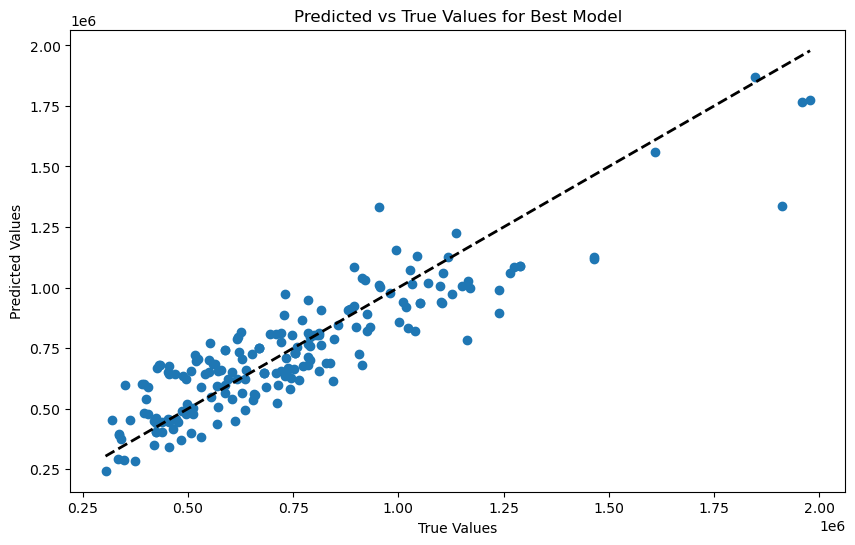

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs True Values for Best Model')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()


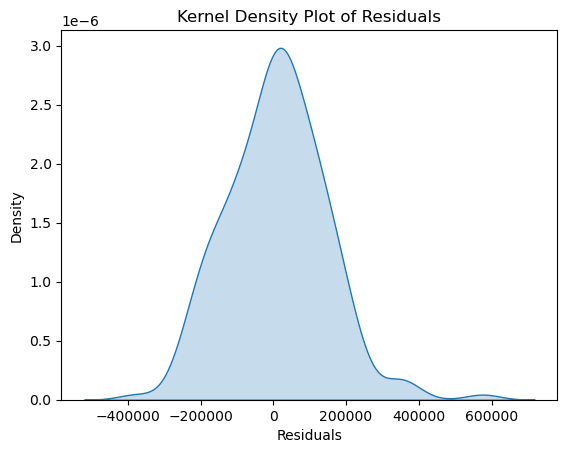

In [39]:
residuals = y_test - y_test_pred3
sns.kdeplot(residuals, fill=True)
plt.title('Kernel Density Plot of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

***The KDE plot residuals are pretty bell-shaped. One strength is that this model has high predictiveness but one weakness is that it has a decent bit of influence from outliers***

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?
